In [14]:
import networkx as nx
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [94]:
G = nx.DiGraph()

In [157]:
G.add_edge('a','b',weight=0.6)
G.add_edge('a','c',weight=0.2)
G.add_edge('b','d',weight=0.1)
G.add_edge('b','e',weight=0.7)
G.add_edge('e','f',weight=0.9)
G.add_edge('c','d',weight=0.3)
G.add_edge('b','f',weight=2)
G.add_edge('d', 'f', weight=-0.2)

# G.add_edge('d','f',weight=0.2)



In [96]:
pos= nx.spring_layout(G) # positions for all nodes

pos['a'] = np.array([0, 1])
pos['f']  = np.array([1,0])

In [97]:
G.nodes()

['c', 'b', 'f', 'a', 'e', 'd']

In [86]:
G.edges()

[('c', 'd'),
 ('b', 'f'),
 ('b', 'e'),
 ('b', 'd'),
 ('a', 'b'),
 ('a', 'c'),
 ('e', 'f'),
 ('d', 'f')]

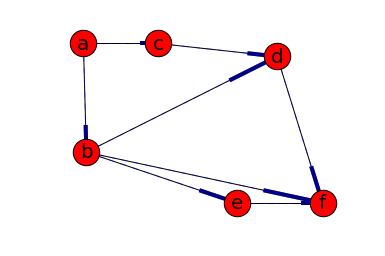

In [149]:
plt.axis('off')
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_edges(G,pos, alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif');


In [158]:
def belman_ford(G, source = 'a', sink = 'f'):
    """
    vertices: list of vertices
    edges: list of edges with accompanying weights
    source: Starting point for the graph
    """

    distance = {}
    vertices = [source] + [i for i in G.nodes() if i != source] ## need to make sure that the source is first
    
    ## Iterate through the nodes
    for v in G.nodes():
        distance[v] = np.inf
    
    #import pdb; pdb.set_trace()
    distance[source] = 0 ## The weight is 0 to the source
    
    for v in vertices:
        for edge in G[v]:
            distance[edge] = min(distance[v] + G[v][edge]['weight'], distance[edge])
            
    return distance[sink]
            

In [159]:
belman_ford(G)

0.3

In [98]:
vertices = G.nodes()
edges = G.edges()

In [116]:
G.nodes()

['c', 'b', 'f', 'a', 'e', 'd']

In [114]:
G['a']

{'b': {'weight': 0.6}, 'c': {'weight': 0.2}}

In [115]:
G['a']['b']['weight']

0.6